In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv('AirBNB.csv',low_memory=False)
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [64]:
df.shape

(74111, 11)

In [43]:
df.describe(include='O').T

,count,unique,top,freq
room_type,74106,3,Entire home/apt,41308
cancellation_policy,74103,3,strict,32500
cleaning_fee,74107,2,True,54399
instant_bookable,74111,2,f,54660


In [54]:
df.describe(exclude='O').T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.0,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
accommodates,74108.0,3.155125e+00,2.153603e+00,1.0,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73908.0,1.235272e+00,5.820540e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.0,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74019.0,1.265797e+00,8.521487e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.0,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01
log_price,74111.0,4.782069e+00,7.173938e-01,0.0,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00


In [65]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [66]:
df=pd.get_dummies(data=df,prefix='',prefix_sep='',columns=['room_type'])

In [67]:
df.head(3)

,id,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,Entire home/apt,Private room,Shared room
0,6901257,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635,1,0,0
1,6304928,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899,1,0,0
2,7919400,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734,1,0,0


In [68]:
df=pd.get_dummies(data=df,prefix='',prefix_sep='',columns=['cancellation_policy'])

In [69]:
df.head(3)

,id,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,Entire home/apt,Private room,Shared room,flexible,moderate,strict
0,6901257,3.0,1.0,True,f,100.0,1.0,1.0,5.010635,1,0,0,0,0,1
1,6304928,7.0,1.0,True,t,93.0,3.0,3.0,5.129899,1,0,0,0,0,1
2,7919400,5.0,1.0,True,t,92.0,1.0,3.0,4.976734,1,0,0,0,1,0


In [70]:
df['cleaning_fee'].unique()

array([True, False, nan], dtype=object)

In [71]:
df['cleaning_fee'].replace({True:'CF_included',False:'CF_excluded'},inplace=True)

In [72]:
df['cleaning_fee'].unique()

array(['CF_included', 'CF_excluded', nan], dtype=object)

In [73]:
df=pd.get_dummies(data=df,prefix='',prefix_sep='',columns=['cleaning_fee'])

In [74]:
df.head(3)

,id,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included
0,6901257,3.0,1.0,f,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1
1,6304928,7.0,1.0,t,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1
2,7919400,5.0,1.0,t,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1


In [75]:
df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [76]:
df['instant_bookable'].replace({'f':'IB_unavailable','t':'IB_available'},inplace=True)

In [77]:
df['instant_bookable'].unique()

array(['IB_unavailable', 'IB_available'], dtype=object)

In [78]:
df=pd.get_dummies(data=df,prefix='',prefix_sep='',columns=['instant_bookable'])

In [79]:
df.head(3)

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
0,6901257,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,0,1
1,6304928,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,1,0
2,7919400,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,1,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   review_scores_rating  57389 non-null  float64
 4   bedrooms              74019 non-null  float64
 5   beds                  73980 non-null  float64
 6   log_price             74111 non-null  float64
 7   Entire home/apt       74111 non-null  uint8  
 8   Private room          74111 non-null  uint8  
 9   Shared room           74111 non-null  uint8  
 10  flexible              74111 non-null  uint8  
 11  moderate              74111 non-null  uint8  
 12  strict                74111 non-null  uint8  
 13  CF_excluded           74111 non-null  uint8  
 14  CF_included           74111 non-null  uint8  
 15  IB_available       

In [81]:
df.drop(columns=['id'],inplace=True)

In [82]:
df.head(3)

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
0,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,0,1
1,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,1,0
2,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,1,0


In [100]:
round((df.isna().sum()/len(df))*100,3)

accommodates            0.000
bathrooms               0.274
review_scores_rating    0.000
bedrooms                0.124
beds                    0.177
log_price               0.000
Entire home/apt         0.000
Private room            0.000
Shared room             0.000
flexible                0.000
moderate                0.000
strict                  0.000
CF_excluded             0.000
CF_included             0.000
IB_available            0.000
IB_unavailable          0.000
dtype: float64

In [87]:
df['review_scores_rating'].describe()

count    57389.000000
mean        94.067365
std          7.836556
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

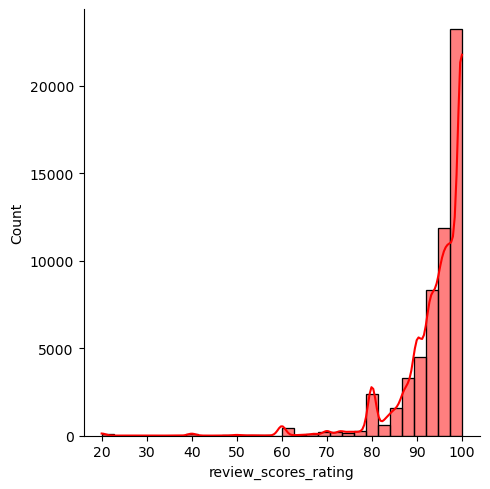

In [88]:
sns.displot(df.review_scores_rating,kde=True,color='red',bins=30)

In [91]:
df['review_scores_rating'].fillna(value=df['review_scores_rating'].median(),inplace=True)

In [93]:
df['accommodates'].describe()

count    74108.000000
mean         3.155125
std          2.153603
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

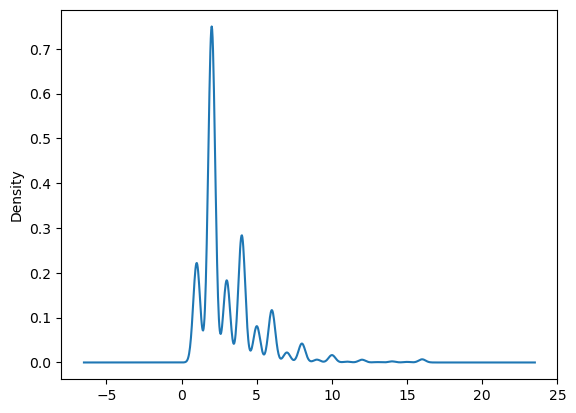

In [98]:
df['accommodates'].plot(kind='kde')
plt.show()

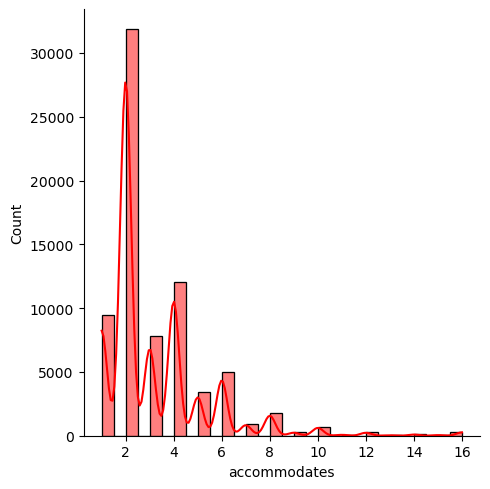

In [97]:
sns.displot(data=df['accommodates'],kde=True,color='red',bins=30)
plt.show()

In [99]:
df['accommodates'].fillna(value=df['accommodates'].median(),inplace=True)

In [102]:
df[['bathrooms','bedrooms','beds']].describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,73908.0,1.235272,0.582054,0.0,1.0,1.0,1.0,8.0
bedrooms,74019.0,1.265797,0.852149,0.0,1.0,1.0,1.0,10.0
beds,73980.0,1.710868,1.254142,0.0,1.0,1.0,2.0,18.0


In [105]:
df['beds'].fillna(value=df['beds'].mean(),inplace=True)

In [106]:
round((df.isna().sum()/len(df))*100,3)

accommodates            0.0
bathrooms               0.0
review_scores_rating    0.0
bedrooms                0.0
beds                    0.0
log_price               0.0
Entire home/apt         0.0
Private room            0.0
Shared room             0.0
flexible                0.0
moderate                0.0
strict                  0.0
CF_excluded             0.0
CF_included             0.0
IB_available            0.0
IB_unavailable          0.0
dtype: float64

In [107]:
df.duplicated().sum()

20982

In [108]:
df.drop_duplicates(inplace=True)

In [109]:
df.duplicated().sum()

0

In [111]:
df.shape

(53129, 16)

In [110]:
df.head(3)

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
0,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,0,1
1,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,1,0
2,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,1,0


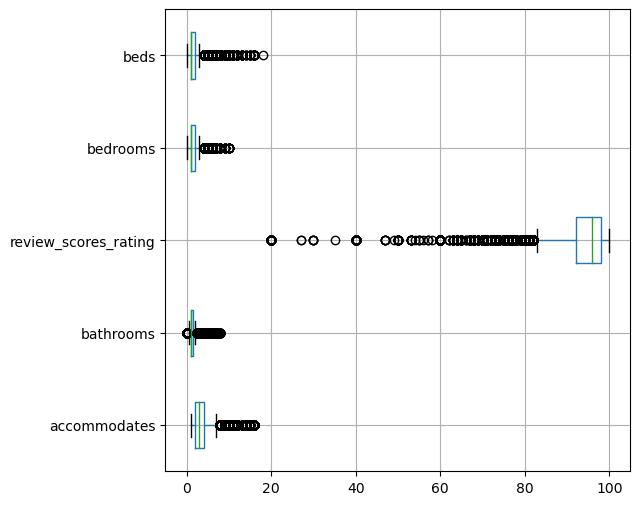

In [137]:
plt.figure(figsize = (6,6))
df.iloc[:, 0:5].boxplot(vert = 0)
plt.show()

In [138]:
def get_ranges(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

In [140]:
for i in df.iloc[:,0:5].columns:
    print(i)

accommodates
bathrooms
review_scores_rating
bedrooms
beds


In [141]:
for i in df.iloc[:,0:5].columns:
    lr,ur=get_ranges(df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])
    df[i]=np.where(df[i]>ur,ur,df[i])

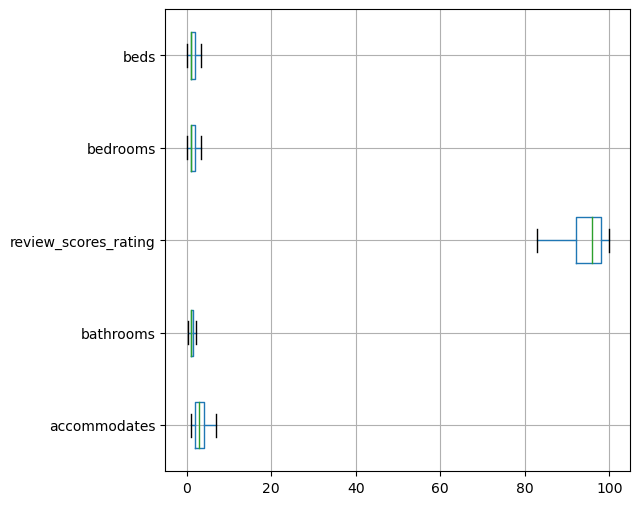

In [142]:
plt.figure(figsize=(6,6))
df.iloc[:,0:5].boxplot(vert=0)
plt.show()

In [143]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
0,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,0,1
1,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,1,0
2,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,1,0
3,4.0,1.0,96.0,2.0,2.0,6.620073,1,0,0,1,0,0,0,1,0,1
4,2.0,1.0,83.0,0.0,1.0,4.744932,1,0,0,0,1,0,0,1,1,0


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [146]:
lr_model=LinearRegression()

In [147]:
Y=df['log_price'].to_frame()

In [150]:
X=df.drop(columns=['log_price'],axis=1)

In [152]:
X.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
0,3.0,1.0,100.0,1.0,1.0,1,0,0,0,0,1,0,1,0,1
1,7.0,1.0,93.0,3.0,3.0,1,0,0,0,0,1,0,1,1,0
2,5.0,1.0,92.0,1.0,3.0,1,0,0,0,1,0,0,1,1,0
3,4.0,1.0,96.0,2.0,2.0,1,0,0,1,0,0,0,1,0,1
4,2.0,1.0,83.0,0.0,1.0,1,0,0,0,1,0,0,1,1,0


In [154]:
Y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


In [155]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [156]:
x_train

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
63199,4.0,2.0,96.0,2.0,2.0,1,0,0,0,0,1,0,1,0,1
29281,6.0,1.0,100.0,2.0,3.0,1,0,0,0,0,1,0,1,1,0
6764,4.0,1.0,100.0,1.0,2.0,1,0,0,0,0,1,0,1,1,0
54811,6.0,2.0,95.0,2.0,2.0,1,0,0,0,0,1,0,1,1,0
43924,4.0,1.0,100.0,1.0,2.0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,4.0,2.0,100.0,2.0,3.0,1,0,0,0,0,1,0,1,0,1
57089,4.0,1.0,100.0,2.0,3.5,1,0,0,0,0,1,0,1,0,1
34425,6.0,2.0,100.0,2.0,3.5,1,0,0,0,0,1,0,1,0,1
32929,2.0,1.0,97.0,0.0,1.0,1,0,0,0,0,1,0,1,1,0


In [157]:
y_train

,log_price
63199,5.147494
29281,5.525453
6764,5.666427
54811,4.969813
43924,4.584967
...,...
7500,5.273000
57089,5.298317
34425,5.187386
32929,4.304065


In [158]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [163]:
round((lr_model.score(x_test,y_test))*100,2)

48.91

In [165]:
X

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
0,3.0,1.0,100.0,1.0,1.0,1,0,0,0,0,1,0,1,0,1
1,7.0,1.0,93.0,3.0,3.0,1,0,0,0,0,1,0,1,1,0
2,5.0,1.0,92.0,1.0,3.0,1,0,0,0,1,0,0,1,1,0
3,4.0,1.0,96.0,2.0,2.0,1,0,0,1,0,0,0,1,0,1
4,2.0,1.0,83.0,0.0,1.0,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,100.0,1.0,1.0,1,0,0,0,0,1,0,1,0,1
74107,4.0,2.0,93.0,2.0,3.5,1,0,0,0,1,0,0,1,0,1
74108,5.0,1.0,94.0,2.0,2.0,1,0,0,0,1,0,0,1,1,0
74109,2.0,1.0,96.0,0.0,2.0,1,0,0,0,0,1,0,1,1,0


In [168]:
df

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
0,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,0,1
1,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,1,0
2,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,1,0
3,4.0,1.0,96.0,2.0,2.0,6.620073,1,0,0,1,0,0,0,1,0,1
4,2.0,1.0,83.0,0.0,1.0,4.744932,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,100.0,1.0,1.0,4.356709,1,0,0,0,0,1,0,1,0,1
74107,4.0,2.0,93.0,2.0,3.5,5.043425,1,0,0,0,1,0,0,1,0,1
74108,5.0,1.0,94.0,2.0,2.0,5.220356,1,0,0,0,1,0,0,1,1,0
74109,2.0,1.0,96.0,0.0,2.0,5.273000,1,0,0,0,0,1,0,1,1,0


In [171]:
X_new=df.drop(columns=['log_price'],axis=1).iloc[:,0:5]
X_new

,accommodates,bathrooms,review_scores_rating,bedrooms,beds
0,3.0,1.0,100.0,1.0,1.0
1,7.0,1.0,93.0,3.0,3.0
2,5.0,1.0,92.0,1.0,3.0
3,4.0,1.0,96.0,2.0,2.0
4,2.0,1.0,83.0,0.0,1.0
...,...,...,...,...,...
74104,2.0,1.0,100.0,1.0,1.0
74107,4.0,2.0,93.0,2.0,3.5
74108,5.0,1.0,94.0,2.0,2.0
74109,2.0,1.0,96.0,0.0,2.0


In [172]:
Y_new=df['log_price'].to_frame()
Y_new

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932
...,...
74104,4.356709
74107,5.043425
74108,5.220356
74109,5.273000


In [173]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y_new,test_size=0.30)

In [174]:
X_train

,accommodates,bathrooms,review_scores_rating,bedrooms,beds
36754,1.0,1.00,96.0,1.0,1.0
31596,2.0,1.00,96.0,1.0,1.0
10834,4.0,1.00,96.0,0.0,2.0
31239,4.0,1.00,96.0,2.0,2.0
30386,3.0,1.00,100.0,0.0,2.0
...,...,...,...,...,...
552,1.0,2.25,100.0,1.0,1.0
32925,4.0,1.00,95.0,1.0,2.0
57052,1.0,1.00,100.0,1.0,1.0
72951,2.0,1.00,85.0,1.0,1.0


In [175]:
Y_train

,log_price
36754,3.912023
31596,4.584967
10834,4.499810
31239,3.912023
30386,5.480639
...,...
552,4.488636
32925,4.828314
57052,5.181784
72951,4.605170


In [176]:
lr_model_2=LinearRegression()

In [177]:
lr_model_2.fit(X_train,Y_train)

LinearRegression()

In [179]:
round(lr_model_2.score(X_test,Y_test)*100,2)

36.25

In [180]:
round(lr_model_2.score(X_train,Y_train)*100,2)

36.99

In [181]:
lr_model.coef_

array([[ 0.10029546,  0.1975183 ,  0.01478579,  0.16280609, -0.04853591,
         0.56719633, -0.03531264, -0.51236708, -0.0141305 , -0.08055377,
        -0.01867219, -0.22114064, -0.30654864, -0.03479684,  0.03479684]])

In [182]:
lr_model.intercept_

array([2.7392322])

In [186]:
for i in x_train.columns:
    print(i)

accommodates
bathrooms
review_scores_rating
bedrooms
beds
Entire home/apt
Private room
Shared room
flexible
moderate
strict
CF_excluded
CF_included
IB_available
IB_unavailable


In [185]:
for i in X_train.columns:
    print(i)

accommodates
bathrooms
review_scores_rating
bedrooms
beds


In [188]:
lr_model.coef_[0]

array([ 0.10029546,  0.1975183 ,  0.01478579,  0.16280609, -0.04853591,
        0.56719633, -0.03531264, -0.51236708, -0.0141305 , -0.08055377,
       -0.01867219, -0.22114064, -0.30654864, -0.03479684,  0.03479684])

In [196]:
for col in range(0,len(x_train.columns)):
    print(col,end=",")

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,

In [199]:
for i in range(0,len(x_train.columns)):
    print(f"The coefficient of {x_train.columns[i]} is : {round(lr_model.coef_[0][i],2)}")

The coefficient of accommodates is : 0.1
The coefficient of bathrooms is : 0.2
The coefficient of review_scores_rating is : 0.01
The coefficient of bedrooms is : 0.16
The coefficient of beds is : -0.05
The coefficient of Entire home/apt is : 0.57
The coefficient of Private room is : -0.04
The coefficient of Shared room is : -0.51
The coefficient of flexible is : -0.01
The coefficient of moderate is : -0.08
The coefficient of strict is : -0.02
The coefficient of CF_excluded is : -0.22
The coefficient of CF_included is : -0.31
The coefficient of IB_available is : -0.03
The coefficient of IB_unavailable is : 0.03


In [200]:
for i in range(0,len(X_train.columns)):
    print(f"The coefficient of {X_train.columns[i]} is : {round(lr_model_2.coef_[0][i],2)}")

The coefficient of accommodates is : 0.21
The coefficient of bathrooms is : 0.12
The coefficient of review_scores_rating is : 0.02
The coefficient of bedrooms is : 0.12
The coefficient of beds is : -0.06


In [201]:
x_train

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
63199,4.0,2.0,96.0,2.0,2.0,1,0,0,0,0,1,0,1,0,1
29281,6.0,1.0,100.0,2.0,3.0,1,0,0,0,0,1,0,1,1,0
6764,4.0,1.0,100.0,1.0,2.0,1,0,0,0,0,1,0,1,1,0
54811,6.0,2.0,95.0,2.0,2.0,1,0,0,0,0,1,0,1,1,0
43924,4.0,1.0,100.0,1.0,2.0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,4.0,2.0,100.0,2.0,3.0,1,0,0,0,0,1,0,1,0,1
57089,4.0,1.0,100.0,2.0,3.5,1,0,0,0,0,1,0,1,0,1
34425,6.0,2.0,100.0,2.0,3.5,1,0,0,0,0,1,0,1,0,1
32929,2.0,1.0,97.0,0.0,1.0,1,0,0,0,0,1,0,1,1,0


In [202]:
y_train

,log_price
63199,5.147494
29281,5.525453
6764,5.666427
54811,4.969813
43924,4.584967
...,...
7500,5.273000
57089,5.298317
34425,5.187386
32929,4.304065


In [206]:
df_1=pd.concat(objs=[y_train,x_train],axis=1)

In [207]:
df_1

,log_price,accommodates,bathrooms,review_scores_rating,bedrooms,beds,Entire home/apt,Private room,Shared room,flexible,moderate,strict,CF_excluded,CF_included,IB_available,IB_unavailable
63199,5.147494,4.0,2.0,96.0,2.0,2.0,1,0,0,0,0,1,0,1,0,1
29281,5.525453,6.0,1.0,100.0,2.0,3.0,1,0,0,0,0,1,0,1,1,0
6764,5.666427,4.0,1.0,100.0,1.0,2.0,1,0,0,0,0,1,0,1,1,0
54811,4.969813,6.0,2.0,95.0,2.0,2.0,1,0,0,0,0,1,0,1,1,0
43924,4.584967,4.0,1.0,100.0,1.0,2.0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,5.273000,4.0,2.0,100.0,2.0,3.0,1,0,0,0,0,1,0,1,0,1
57089,5.298317,4.0,1.0,100.0,2.0,3.5,1,0,0,0,0,1,0,1,0,1
34425,5.187386,6.0,2.0,100.0,2.0,3.5,1,0,0,0,0,1,0,1,0,1
32929,4.304065,2.0,1.0,97.0,0.0,1.0,1,0,0,0,0,1,0,1,1,0


In [210]:
df_1.columns

Index(['log_price', 'accommodates', 'bathrooms', 'review_scores_rating',
       'bedrooms', 'beds', 'Entire home/apt', 'Private room', 'Shared room',
       'flexible', 'moderate', 'strict', 'CF_excluded', 'CF_included',
       'IB_available', 'IB_unavailable'],
      dtype='object')

In [208]:
import statsmodels.formula.api as smf

In [220]:
df_1.rename(columns={'Entire home/apt':'entire_home_apt','Private room':'private_room','Shared room':'shared_room'},inplace=True)

In [221]:
expr='log_price~accommodates+bathrooms+review_scores_rating+bedrooms+beds+entire_home_apt+private_room+shared_room+flexible+moderate+strict+CF_excluded+CF_included+IB_available+IB_unavailable'

In [222]:
lr_model_2=smf.ols(formula=expr,data=df_1).fit()
lr_model_2

In [223]:
lr_model_2.params

Intercept               1.826155
accommodates            0.100295
bathrooms               0.197518
review_scores_rating    0.014786
bedrooms                0.162806
beds                   -0.048536
entire_home_apt         0.567196
private_room           -0.035313
shared_room            -0.512367
flexible               -0.014131
moderate               -0.080554
strict                 -0.018672
CF_excluded            -0.221141
CF_included            -0.306549
IB_available            0.878281
IB_unavailable          0.947874
dtype: float64

In [224]:
lr_model.coef_[0]

array([ 0.10029546,  0.1975183 ,  0.01478579,  0.16280609, -0.04853591,
        0.56719633, -0.03531264, -0.51236708, -0.0141305 , -0.08055377,
       -0.01867219, -0.22114064, -0.30654864, -0.03479684,  0.03479684])

In [225]:
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     2711.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:00:00   Log-Likelihood:                -29423.
No. Observations:               37190   AIC:                         5.888e+04
Df Residuals:                   37175   BIC:                         5.900e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.8262      0.310      5.883      0.000       1.218       2.435
accommodates             0.1003      0.003     32.380      0.000       0.094       0.106
bathrooms                0.1975      0.008     26.198      0.000       0.183       0.212
review_scores_rating     0.0148      0.001     26.442      0.000       0.014       0.016
bedrooms                 0.1628      0.005     31.516      0.000       0.153       0.173
beds                    -0.0485      0.006     -8.529      0.000      -0.060      -0.037
entire_home_apt          0.5672      0.267      2.124      0.034       0.044       1.090
private_room            -0.0353      0.267     -0.132      0.895      -0.559       0.488
shared_room             -0.5124      0.267     -1.916      0.055      -1.036       0.012
flexible                -0.0141      0.267     -0.053      0.958      -0.538       0.509
moderate                -0.0806      0.267     -0.302      0.763      -0.604       0.443
strict                  -0.0187      0.267     -0.070      0.944      -0.542       0.505
CF_excluded             -0.2211      0.462     -0.478      0.632      -1.127       0.685
CF_included             -0.3065      0.462     -0.663      0.507      -1.213       0.600
IB_available             0.8783      0.155      5.658      0.000       0.574       1.183
IB_unavailable           0.9479      0.155      6.105      0.000       0.644       1.252
==============================================================================
Omnibus:                     3437.155   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7344.797
Skew:                           0.595   Prob(JB):                         0.00
Kurtosis:                       4.823   Cond. No.                     4.36e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""